In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import networkx as nx
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform

%matplotlib inline
pd.options.display.max_rows = 68
pd.options.display.max_columns = 68

In [152]:
# read the sequences file
arquivo = 'hikoyu_fasta.txt'

file_content = open(arquivo, "r")

all_lines = file_content.readlines();

sequences = {}
sequences_info = {}
description = ''

for line in all_lines:
    
    sequence = []
    
    if ">" in line:
        description = line[1:line.find('.') + 2 ]
        sequence = []
        sequences[description] = sequence
    else:
        sequences[description].append(line)
        
file_content.close()

In [153]:
#count A,T,C,G,AA,AT,AC,AG,TT,TA,TC,TG,CC,CA,CT,CG,GG,GA,GT,GC for each sequence

for description in sequences:
    
    sequences_info[description] = {}
    
    sequences_info[description]['A'] = 0
    sequences_info[description]['T'] = 0
    sequences_info[description]['C'] = 0
    sequences_info[description]['G'] = 0
    
    sequences_info[description]['AA'] = 0
    sequences_info[description]['AT'] = 0
    sequences_info[description]['AC'] = 0
    sequences_info[description]['AG'] = 0
    
    sequences_info[description]['TA'] = 0
    sequences_info[description]['TT'] = 0
    sequences_info[description]['TC'] = 0
    sequences_info[description]['TG'] = 0
    
    sequences_info[description]['CA'] = 0
    sequences_info[description]['CT'] = 0
    sequences_info[description]['CC'] = 0
    sequences_info[description]['CG'] = 0
    
    sequences_info[description]['GA'] = 0
    sequences_info[description]['GT'] = 0
    sequences_info[description]['GC'] = 0
    sequences_info[description]['GG'] = 0
    
    sequences_info[description]['SIZE'] = 0
    
   # key = '>MT126808.1 Severe acute respiratory syndrome coronavirus 2 isolate SARS-CoV-2/SP02/human/2020/BRA, complete genome\n'
    #key = '>MN996532.1 Bat coronavirus RaTG13, complete genome\n'
   
    for line in sequences[description]:
        
        sequences_info[description]['SIZE'] += len(line.replace('\n', '').strip())
        sequences_info[description]['A'] += len(re.findall('(?=A)', line))
        sequences_info[description]['T'] += len(re.findall('(?=T)', line))
        sequences_info[description]['C'] += len(re.findall('(?=C)', line))
        sequences_info[description]['G'] += len(re.findall('(?=G)', line))
        
        sequences_info[description]['AA'] += len(re.findall('(?=AA)', line))
        sequences_info[description]['AT'] += len(re.findall('(?=AT)', line))
        sequences_info[description]['AC'] += len(re.findall('(?=AC)', line))
        sequences_info[description]['AG'] += len(re.findall('(?=AG)', line))
    
        sequences_info[description]['TA'] += len(re.findall('(?=TA)', line))
        sequences_info[description]['TT'] += len(re.findall('(?=TT)', line))
        sequences_info[description]['TC'] += len(re.findall('(?=TC)', line))
        sequences_info[description]['TG'] += len(re.findall('(?=TG)', line))
    
        sequences_info[description]['CA'] += len(re.findall('(?=CA)', line))
        sequences_info[description]['CT'] += len(re.findall('(?=CT)', line))
        sequences_info[description]['CC'] += len(re.findall('(?=CC)', line))
        sequences_info[description]['CG'] += len(re.findall('(?=CG)', line))
    
        sequences_info[description]['GA'] += len(re.findall('(?=GA)', line))
        sequences_info[description]['GT'] += len(re.findall('(?=GT)', line))
        sequences_info[description]['GC'] += len(re.findall('(?=GC)', line))
        sequences_info[description]['GG'] += len(re.findall('(?=GG)', line))
    

In [154]:
#calc dinucleotideo bias

for description in sequences:
         
    fA = sequences_info[description]['A'] / sequences_info[description]['SIZE'] 
    fT = sequences_info[description]['T'] / sequences_info[description]['SIZE']
    fC = sequences_info[description]['C'] / sequences_info[description]['SIZE']
    fG = sequences_info[description]['G'] / sequences_info[description]['SIZE'] 
        
    fAA = sequences_info[description]['AA'] / sequences_info[description]['SIZE']       
    fAT = sequences_info[description]['AT'] / sequences_info[description]['SIZE']       
    fAC = sequences_info[description]['AC'] / sequences_info[description]['SIZE']       
    fAG = sequences_info[description]['AG'] / sequences_info[description]['SIZE']    
      
    fTA = sequences_info[description]['TA'] / sequences_info[description]['SIZE']       
    fTT = sequences_info[description]['TT'] / sequences_info[description]['SIZE']       
    fTC = sequences_info[description]['TC'] / sequences_info[description]['SIZE']       
    fTG = sequences_info[description]['TG'] / sequences_info[description]['SIZE']       

    fCA = sequences_info[description]['CA'] / sequences_info[description]['SIZE']       
    fCT = sequences_info[description]['CT'] / sequences_info[description]['SIZE']       
    fCC = sequences_info[description]['CC'] / sequences_info[description]['SIZE']       
    fCG = sequences_info[description]['CG'] / sequences_info[description]['SIZE']       

    fGA = sequences_info[description]['GA'] / sequences_info[description]['SIZE']       
    fGT = sequences_info[description]['GT'] / sequences_info[description]['SIZE']       
    fGC = sequences_info[description]['GC'] / sequences_info[description]['SIZE']       
    fGG = sequences_info[description]['GG'] / sequences_info[description]['SIZE']
        
   # sequences_info[description]['fA'] = fA
    sequences_info[description]['fT'] = fT
    sequences_info[description]['fC'] = fC
    sequences_info[description]['fG'] = fG
       
    sequences_info[description]['pAA'] = fAA/(fA*fA)
    sequences_info[description]['pAT'] = fAT/(fA*fT)
    sequences_info[description]['pAC'] = fAC/(fA*fC)
    sequences_info[description]['pAG'] = fAG/(fA*fG)

    sequences_info[description]['pTA'] = fTA/(fT*fA)
    sequences_info[description]['pTT'] = fTT/(fT*fT)
    sequences_info[description]['pTC'] = fTC/(fT*fC)
    sequences_info[description]['pTG'] = fTG/(fT*fG)
      
    sequences_info[description]['pCA'] = fCA/(fC*fA)
    sequences_info[description]['pCT'] = fCT/(fC*fT)
    sequences_info[description]['pCC'] = fCC/(fC*fC)
    sequences_info[description]['pCG'] = fCG/(fC*fG)

    sequences_info[description]['pGA'] = fGA/(fG*fA)
    sequences_info[description]['pGT'] = fGT/(fG*fT)
    sequences_info[description]['pGC'] = fGC/(fG*fC)
    sequences_info[description]['pGG'] = fGG/(fG*fG)


In [155]:
#key = '>MT126808.1 Severe acute respiratory syndrome coronavirus 2 isolate SARS-CoV-2/SP02/human/2020/BRA, complete genome\n'
key = 'MG772933.1'
sequences_info[key]

{'A': 8740,
 'T': 9468,
 'C': 5574,
 'G': 6020,
 'AA': 2665,
 'AT': 2246,
 'AC': 1963,
 'AG': 1720,
 'TA': 2253,
 'TT': 3080,
 'TC': 1436,
 'TG': 2556,
 'CA': 2057,
 'CT': 2060,
 'CC': 877,
 'CG': 492,
 'GA': 1620,
 'GT': 1957,
 'GC': 1204,
 'GG': 1119,
 'SIZE': 29802,
 'fT': 0.31769679887255886,
 'fC': 0.1870344272196497,
 'fG': 0.20199986578082008,
 'pAA': 1.039728044865921,
 'pAT': 0.8088825759223652,
 'pAC': 1.2008459922211578,
 'pAG': 0.9742399476953254,
 'pTA': 0.8114035812792024,
 'pTT': 1.0239520701577405,
 'pTC': 0.8109136980813054,
 'pTG': 1.3364463196190142,
 'pCA': 1.2583495700452987,
 'pCT': 1.16328845267931,
 'pCC': 0.8412228773990267,
 'pCG': 0.4369654077366796,
 'pGA': 0.9175980902711787,
 'pGT': 1.0232493926034472,
 'pGC': 1.0693218514531755,
 'pGG': 0.9202006048498361}

In [156]:
key = 'MT126808.1'
#key = '>MN996532.1 Bat coronavirus RaTG13, complete genome\n'
sequences_info[key]

{'A': 8927,
 'T': 9596,
 'C': 5492,
 'G': 5861,
 'AA': 2804,
 'AT': 2275,
 'AC': 1987,
 'AG': 1705,
 'TA': 2339,
 'TT': 3179,
 'TC': 1392,
 'TG': 2543,
 'CA': 2039,
 'CT': 2031,
 'CC': 877,
 'CG': 430,
 'GA': 1591,
 'GT': 1957,
 'GC': 1151,
 'GG': 1078,
 'SIZE': 29876,
 'fT': 0.3211942696478779,
 'fC': 0.18382648279555497,
 'fG': 0.1961775338063998,
 'pAA': 1.0512097746544045,
 'pAT': 0.7934290140775491,
 'pAC': 1.2108330162976855,
 'pAG': 0.9735753690567984,
 'pTA': 0.8157496544735767,
 'pTT': 1.031412760388386,
 'pTC': 0.7891161254067077,
 'pTG': 1.3508491388559145,
 'pCA': 1.2425206443034629,
 'pCT': 1.151361243319701,
 'pCC': 0.8686823289016296,
 'pCG': 0.3991063671835243,
 'pGA': 0.9084800071374582,
 'pGT': 1.0395642016284012,
 'pGC': 1.0683056479726432,
 'pGG': 0.937557190304268}

In [157]:
#creating a dataframe
df_original = pd.DataFrame.from_dict(sequences_info, orient='index', columns=[ 'fT', 'fC', 'fG',
                                                                     'pAA','pAT', 'pAC', 'pAG',
                                                                     'pTA','pTA', 'pTC', 'pTG',
                                                                     'pCA','pCT', 'pCC', 'pCG',
                                                                     'pGA','pGT', 'pGC', 'pGG'])

In [158]:
df_original

,fT,fC,fG,pAA,pAT,pAC,pAG,pTA,pTA,pTC,pTG,pCA,pCT,pCC,pCG,pGA,pGT,pGC,pGG
LC521925.1,0.321261,0.183798,0.196094,1.053374,0.793189,1.213801,0.975900,0.817267,0.817267,0.785843,1.349755,1.247959,1.154650,0.863817,0.402503,0.907296,1.037046,1.074580,0.936627
LC522972.1,0.321139,0.183714,0.196231,1.050713,0.790769,1.210424,0.973443,0.817616,0.817616,0.780038,1.354868,1.247602,1.152188,0.868699,0.402929,0.910677,1.039387,1.076952,0.943934
LC522973.1,0.321139,0.183714,0.196231,1.050713,0.790420,1.211033,0.973443,0.816919,0.816919,0.780038,1.355399,1.248821,1.151620,0.868699,0.402000,0.910677,1.040450,1.075095,0.943934
LC522974.1,0.321106,0.183747,0.196231,1.050713,0.790502,1.210813,0.973443,0.817004,0.817004,0.779978,1.355541,1.248593,1.152098,0.868382,0.401927,0.910677,1.040027,1.075828,0.943934
LC522975.1,0.321139,0.183747,0.196198,1.050713,0.790769,1.210813,0.973038,0.816919,0.816919,0.779896,1.356162,1.248593,1.151978,0.868382,0.401996,0.910832,1.040096,1.076011,0.943386
LC528232.1,0.321216,0.183700,0.196141,1.056038,0.791962,1.217347,0.978725,0.812510,0.812510,0.784385,1.346121,1.246578,1.155608,0.869122,0.402821,0.913705,1.034008,1.074809,0.936224
LC528233.1,0.321082,0.183901,0.196274,1.054459,0.799448,1.210140,0.971300,0.812348,0.812348,0.782723,1.342049,1.252142,1.163890,0.866237,0.394695,0.907421,1.042755,1.070125,0.928004
LR757995.1,0.321003,0.183784,0.196204,1.051016,0.789272,1.208606,0.974612,0.811245,0.811245,0.792144,1.354312,1.244548,1.155304,0.865235,0.402912,0.913556,1.044967,1.075979,0.939171
LR757996.1,0.320945,0.183742,0.196230,1.054757,0.791767,1.209359,0.980648,0.814090,0.814090,0.787465,1.361997,1.248351,1.164448,0.856824,0.403005,0.897358,1.034522,1.059512,0.933828
LR757997.1,0.207602,0.123180,0.129441,1.615576,1.195414,1.839265,1.466212,1.234030,1.234030,1.229511,2.046303,1.902932,1.772412,1.264830,0.682922,1.369273,1.587911,1.645415,1.409446


In [159]:
df_original.describe()

,fT,fC,fG,pAA,pAT,pAC,pAG,pTA,pTA,pTC,pTG,pCA,pCT,pCC,pCG,pGA,pGT,pGC,pGG
count,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000
mean,0.319309,0.182925,0.195282,1.060882,0.798369,1.220289,0.981238,0.821167,0.821167,0.795349,1.362445,1.254288,1.165599,0.872113,0.404266,0.913967,1.048179,1.076738,0.943741
std,0.013758,0.007366,0.008135,0.068321,0.048967,0.076253,0.059806,0.050864,0.050864,0.053615,0.084329,0.079968,0.074951,0.048587,0.034676,0.056253,0.066541,0.070158,0.057531
min,0.207602,0.123180,0.129441,1.039728,0.784220,1.200846,0.963477,0.808026,0.808026,0.779800,1.336446,1.228956,1.151238,0.841223,0.394420,0.889707,1.023249,1.056582,0.920201
25%,0.320960,0.183711,0.196145,1.051433,0.791412,1.209075,0.972156,0.814030,0.814030,0.787312,1.351388,1.241471,1.152463,0.865696,0.398189,0.906404,1.040019,1.066494,0.936500
50%,0.321091,0.183756,0.196201,1.052055,0.792441,1.210795,0.973027,0.815244,0.815244,0.789473,1.352273,1.242771,1.153000,0.868160,0.398719,0.907742,1.041047,1.067531,0.937975
75%,0.321143,0.183824,0.196233,1.054776,0.793081,1.211780,0.974672,0.815902,0.815902,0.790163,1.353692,1.248526,1.160124,0.868937,0.401944,0.908672,1.041668,1.070691,0.938620
max,0.321308,0.187034,0.202000,1.615576,1.195414,1.839265,1.466212,1.234030,1.234030,1.229511,2.046303,1.902932,1.772412,1.264830,0.682922,1.369273,1.587911,1.645415,1.409446


In [160]:
#standardization
#Useful: https://stackoverflow.com/questions/40758562/can-anyone-explain-me-standardscaler
scaler = StandardScaler()
std_data = scaler.fit_transform(df_original.values)
df_std = pd.DataFrame(std_data, index=df_original.index, columns=df_original.columns)

In [161]:
df_std

,fT,fC,fG,pAA,pAT,pAC,pAG,pTA,pTA,pTC,pTG,pCA,pCT,pCC,pCG,pGA,pGT,pGC,pGG
LC521925.1,0.142953,0.119317,0.100554,-0.110701,-0.106577,-0.085718,-0.089920,-0.077238,-0.077238,-0.178624,-0.151601,-0.079731,-0.147159,-0.172007,-0.051237,-0.119481,-0.168557,-0.030988,-0.124571
LC522972.1,0.134037,0.107810,0.117619,-0.149937,-0.156364,-0.130343,-0.131309,-0.070328,-0.070328,-0.287697,-0.090517,-0.084225,-0.180261,-0.070787,-0.038863,-0.058921,-0.133107,0.003074,0.003381
LC522973.1,0.134037,0.107810,0.117619,-0.149937,-0.163537,-0.122291,-0.131309,-0.084140,-0.084140,-0.287697,-0.084172,-0.068869,-0.187887,-0.070787,-0.065836,-0.058921,-0.117025,-0.023589,0.003381
LC522974.1,0.131586,0.112387,0.117619,-0.149937,-0.161842,-0.125205,-0.131309,-0.082453,-0.082453,-0.288839,-0.082484,-0.071735,-0.181468,-0.077349,-0.067963,-0.058921,-0.123425,-0.013072,0.003381
LC522975.1,0.134037,0.112387,0.113474,-0.149937,-0.156364,-0.125205,-0.138126,-0.084140,-0.084140,-0.290367,-0.075064,-0.071735,-0.183082,-0.077349,-0.065971,-0.056139,-0.122380,-0.010436,-0.006205
LC528232.1,0.139651,0.105939,0.106397,-0.071427,-0.131812,-0.038871,-0.042340,-0.171458,-0.171458,-0.206021,-0.195017,-0.097122,-0.134290,-0.062015,-0.041983,-0.004703,-0.214556,-0.027704,-0.131622
LC528233.1,0.129856,0.133381,0.122963,-0.094705,0.022212,-0.134094,-0.167408,-0.174657,-0.174657,-0.237254,-0.243659,-0.027034,-0.022970,-0.121823,-0.278063,-0.117229,-0.082125,-0.094963,-0.275573
LR757995.1,0.124052,0.117435,0.114208,-0.145474,-0.187153,-0.154353,-0.111620,-0.196514,-0.196514,-0.060233,-0.097165,-0.122701,-0.138370,-0.142615,-0.039352,-0.007363,-0.048626,-0.010903,-0.080024
LR757996.1,0.119845,0.111643,0.117462,-0.090308,-0.135832,-0.144411,-0.009949,-0.140169,-0.140169,-0.148156,-0.005356,-0.074791,-0.015461,-0.317004,-0.036654,-0.297450,-0.206767,-0.247353,-0.173580
LR757997.1,-8.180074,-8.171014,-8.153627,8.179309,8.168764,8.177771,8.169440,8.177340,8.177340,8.158042,8.169671,8.171637,8.156345,8.142896,8.095748,8.154033,8.171530,8.165868,8.155005


In [162]:
#create a distance matrix
#useful: https://www.drawingfromdata.com/making-a-pairwise-distance-matrix-with-pandas

distance_matrix = pd.DataFrame(
    squareform(pdist(df_std, metric='euclidean')),
    columns = df_std.index,
    index = df_std.index
)


In [163]:
distance_matrix

,LC521925.1,LC522972.1,LC522973.1,LC522974.1,LC522975.1,LC528232.1,LC528233.1,LR757995.1,LR757996.1,LR757997.1,LR757998.1,MG772933.1,MN908947.3,MN938384.1,MN975262.1,MN985325.1,MN988668.1,MN988669.1,MN988713.1,MN994467.1,MN994468.1,MN996527.1,MN996528.1,MN996529.1,MN996530.1,MN996531.1,MN996532.1,MN997409.1,MT007544.1,MT012098.1,MT019529.1,MT019530.1,MT019531.1,MT019532.1,MT019533.1,MT020781.1,MT020880.1,MT020881.1,MT027062.1,MT027063.1,MT027064.1,MT039873.1,MT039887.1,MT039888.1,MT039890.1,MT044257.1,MT044258.1,MT049951.1,MT050493.1,MT066175.1,MT066176.1,MT072688.1,MT093571.1,MT093631.1,MT106052.1,MT106053.1,MT106054.1,MT118835.1,MT123290.1,MT123291.1,MT123292.1,MT123293.1,MT126808.1,MT135041.1,MT135042.1,MT135043.1,MT135044.1,MT152824.1
LC521925.1,0.000000,0.240666,0.244665,0.241229,0.240301,0.235063,0.404339,0.301885,0.403957,36.071506,0.355781,1.633011,0.287261,0.452018,0.276510,0.249898,0.346837,0.346837,0.254028,0.277392,0.247092,0.159215,0.260999,0.288752,0.516345,0.379804,0.748518,0.260888,0.325615,0.450155,0.260528,0.269701,0.283174,0.259235,0.246019,0.496972,0.249898,0.249898,0.250424,0.250424,0.250985,0.231614,0.199598,0.252401,0.294401,0.258951,0.251019,0.305468,0.409325,0.247251,0.240961,0.265997,0.230646,0.370687,0.272635,0.248158,0.238304,0.255475,0.244461,0.446005,0.335834,0.444440,0.216492,0.284205,0.284205,0.285467,0.284205,0.440160
LC522972.1,0.240666,0.000000,0.050290,0.042954,0.045580,0.303923,0.515734,0.333328,0.547563,36.042919,0.460597,1.726128,0.335325,0.602372,0.340107,0.322000,0.466949,0.466949,0.320626,0.332147,0.310238,0.281900,0.317694,0.346132,0.624905,0.545550,0.834546,0.328911,0.347823,0.611874,0.316838,0.323049,0.324667,0.316626,0.311124,0.518374,0.322000,0.322000,0.312477,0.312477,0.309122,0.062578,0.229038,0.304394,0.354716,0.327078,0.279114,0.366218,0.561602,0.330414,0.302715,0.295870,0.310531,0.498499,0.341557,0.313512,0.311288,0.315432,0.310309,0.556737,0.502450,0.563328,0.288975,0.353414,0.353414,0.354798,0.353414,0.523187
LC522973.1,0.244665,0.050290,0.000000,0.017225,0.024704,0.302363,0.498180,0.324078,0.537861,36.054287,0.446214,1.743246,0.316725,0.589836,0.318175,0.300053,0.450051,0.450051,0.299637,0.311764,0.291702,0.278267,0.297956,0.331460,0.612204,0.541139,0.835188,0.305599,0.326692,0.604717,0.300655,0.301618,0.304855,0.296814,0.291012,0.514238,0.300053,0.300053,0.291533,0.291533,0.290792,0.072015,0.212818,0.284901,0.333422,0.307363,0.278282,0.347267,0.550477,0.309245,0.283411,0.288545,0.292565,0.493831,0.317646,0.292709,0.291098,0.295093,0.305914,0.548641,0.500768,0.542497,0.272764,0.335673,0.335673,0.336557,0.335673,0.509337
LC522974.1,0.241229,0.042954,0.017225,0.000000,0.016643,0.302487,0.497282,0.324400,0.536561,36.054392,0.448101,1.740257,0.319999,0.590607,0.321449,0.304049,0.451337,0.451337,0.302886,0.316051,0.295167,0.273792,0.301422,0.332407,0.613771,0.540329,0.829896,0.309187,0.330233,0.604842,0.303893,0.305910,0.308581,0.300292,0.294568,0.515015,0.304049,0.304049,0.295832,0.295832,0.294487,0.065995,0.212220,0.289012,0.335728,0.311201,0.274627,0.350453,0.550105,0.312902,0.286993,0.288467,0.295731,0.491939,0.321413,0.296483,0.294229,0.299262,0.307315,0.544824,0.496122,0.541409,0.276019,0.339221,0.339221,0.340332,0.339221,0.510330
LC522975.1,0.240301,0.045580,0.024704,0.016643,0.000000,0.302119,0.493668,0.322778,0.536890,36.054363,0.443154,1.739301,0.319643,0.589487,0.321440,0.304010,0.451680,0.451680,0.303259,0.315883,0.294569,0.275524,0.301194,0.336504,0.616426,0.535332,0.833089,0.309417,0.330546,0.600553,0.303125,0.305852,0.308323,0.300075,0.294010,0.517620,0.304010,0.304010,0.295605,0.295605,0.294165,0.069812,0.210414,0.288784,0.334450,0.311851,0.278095,0.350370,0.550584,0.313047,0.287537,0.286868,0.294800,0.489524,0.321456,0.296654,0.294432,0.299325,0.308658,0.543083,0.495329,0.541009,0.275486,0.338639,0.338639,0.339956,0.338639,0.512915
LC528232.1,0.235063,0.303923,0.302363,0.302487,0.302119,0.000000,0.430722,0.311226,0.519442,36.063131,0.345027,1.662393,0.340820,0.

In [164]:
#create an adjacency matrix
#useful: https://www.drawingfromdata.com/making-a-pairwise-distance-matrix-with-pandas

adj_matrix_0_018 = distance_matrix.copy()
adj_matrix_0_036 = distance_matrix.copy()
adj_matrix_0_055 = distance_matrix.copy()
adj_matrix_0_075 = distance_matrix.copy()
adj_matrix_2_0   = distance_matrix.copy()

In [165]:
#Defining functions to get nodes and edges
def get_nodes(matrix):
    nodes = []
    for i in range(len(matrix.values)):
            nodes.append((i))
    return nodes

def get_edges(matrix):
    edges = []
    for i in range(len(matrix.values)):
        for j in range(len(matrix.values)):
            if(i != j and matrix.values[i][j] == 1):
                edges.append((i,j))
    return edges

In [166]:
#applying the thresholds
adj_matrix_0_018 = adj_matrix_0_018.applymap(lambda x: 1 if x <= 0.018 else 0)

In [167]:
adj_matrix_0_018

,LC521925.1,LC522972.1,LC522973.1,LC522974.1,LC522975.1,LC528232.1,LC528233.1,LR757995.1,LR757996.1,LR757997.1,LR757998.1,MG772933.1,MN908947.3,MN938384.1,MN975262.1,MN985325.1,MN988668.1,MN988669.1,MN988713.1,MN994467.1,MN994468.1,MN996527.1,MN996528.1,MN996529.1,MN996530.1,MN996531.1,MN996532.1,MN997409.1,MT007544.1,MT012098.1,MT019529.1,MT019530.1,MT019531.1,MT019532.1,MT019533.1,MT020781.1,MT020880.1,MT020881.1,MT027062.1,MT027063.1,MT027064.1,MT039873.1,MT039887.1,MT039888.1,MT039890.1,MT044257.1,MT044258.1,MT049951.1,MT050493.1,MT066175.1,MT066176.1,MT072688.1,MT093571.1,MT093631.1,MT106052.1,MT106053.1,MT106054.1,MT118835.1,MT123290.1,MT123291.1,MT123292.1,MT123293.1,MT126808.1,MT135041.1,MT135042.1,MT135043.1,MT135044.1,MT152824.1
LC521925.1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
LC522972.1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
LC522973.1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
LC522974.1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
LC522975.1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
LC528232.1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
LC528233.1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
LR757995.1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
LR757996.1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
LR757997.1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


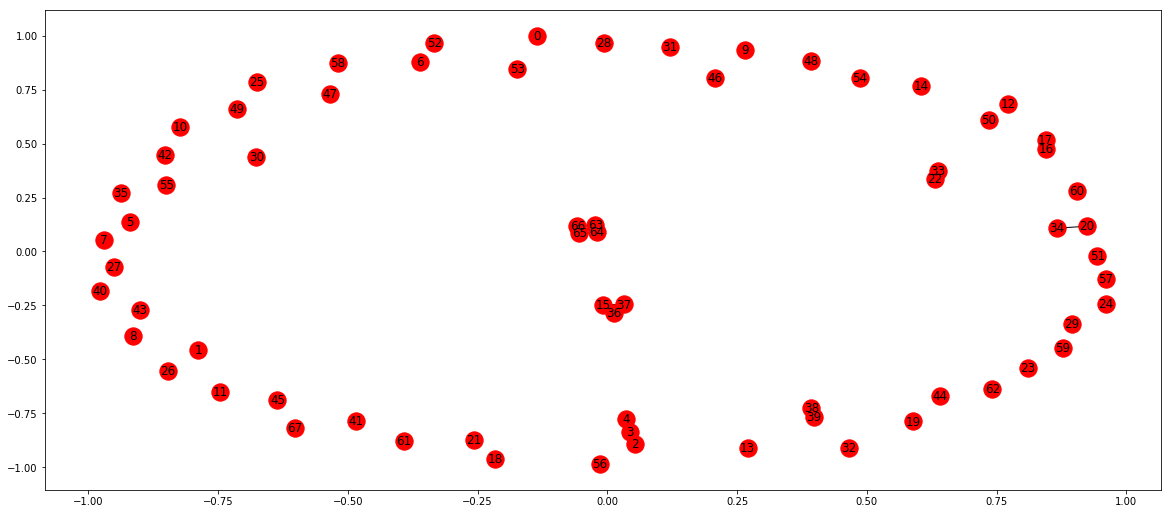

In [168]:
#creating graph
G = nx.Graph() 
plt.figure(figsize =(20, 30)) 

G.add_nodes_from(get_nodes(adj_matrix_0_018)) 
G.add_edges_from(get_edges(adj_matrix_0_018)) 
  
# First Graph created 
plt.subplot(311) 
nx.draw_networkx(G) 

In [169]:
adj_matrix_0_036 = adj_matrix_0_036.applymap(lambda x: 1 if x <= 0.036 else 0)

In [170]:
adj_matrix_0_036

,LC521925.1,LC522972.1,LC522973.1,LC522974.1,LC522975.1,LC528232.1,LC528233.1,LR757995.1,LR757996.1,LR757997.1,LR757998.1,MG772933.1,MN908947.3,MN938384.1,MN975262.1,MN985325.1,MN988668.1,MN988669.1,MN988713.1,MN994467.1,MN994468.1,MN996527.1,MN996528.1,MN996529.1,MN996530.1,MN996531.1,MN996532.1,MN997409.1,MT007544.1,MT012098.1,MT019529.1,MT019530.1,MT019531.1,MT019532.1,MT019533.1,MT020781.1,MT020880.1,MT020881.1,MT027062.1,MT027063.1,MT027064.1,MT039873.1,MT039887.1,MT039888.1,MT039890.1,MT044257.1,MT044258.1,MT049951.1,MT050493.1,MT066175.1,MT066176.1,MT072688.1,MT093571.1,MT093631.1,MT106052.1,MT106053.1,MT106054.1,MT118835.1,MT123290.1,MT123291.1,MT123292.1,MT123293.1,MT126808.1,MT135041.1,MT135042.1,MT135043.1,MT135044.1,MT152824.1
LC521925.1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
LC522972.1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
LC522973.1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
LC522974.1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
LC522975.1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
LC528232.1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
LC528233.1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
LR757995.1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
LR757996.1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
LR757997.1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


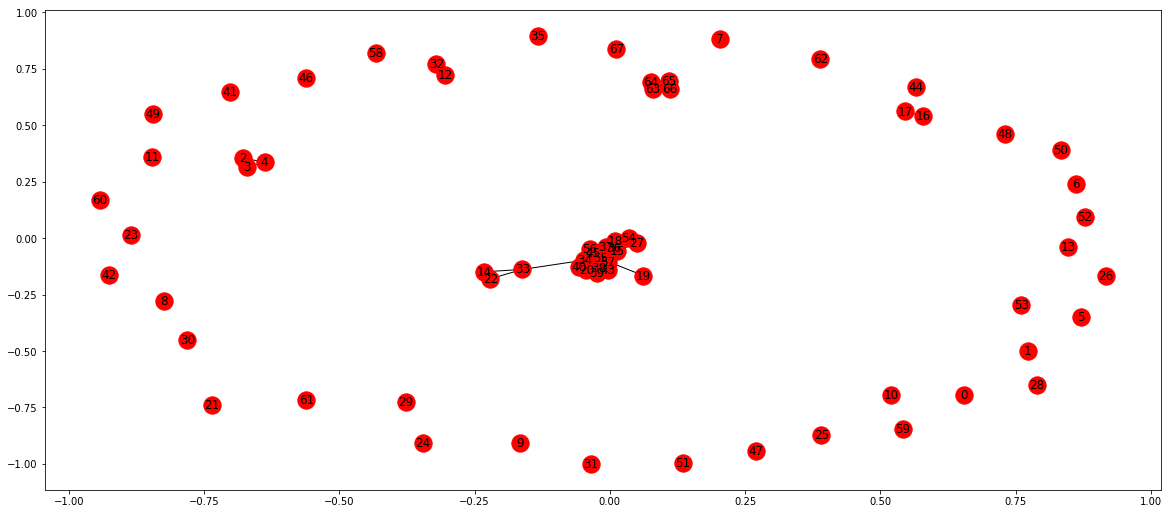

In [171]:
plt.figure(figsize =(20, 30)) 

G.add_nodes_from(get_nodes(adj_matrix_0_036)) 
G.add_edges_from(get_edges(adj_matrix_0_036)) 
  
plt.subplot(311) 
nx.draw_networkx(G) 

In [172]:
adj_matrix_0_055 = adj_matrix_0_055.applymap(lambda x: 1 if x <= 0.055 else 0)

In [173]:
adj_matrix_0_055

,LC521925.1,LC522972.1,LC522973.1,LC522974.1,LC522975.1,LC528232.1,LC528233.1,LR757995.1,LR757996.1,LR757997.1,LR757998.1,MG772933.1,MN908947.3,MN938384.1,MN975262.1,MN985325.1,MN988668.1,MN988669.1,MN988713.1,MN994467.1,MN994468.1,MN996527.1,MN996528.1,MN996529.1,MN996530.1,MN996531.1,MN996532.1,MN997409.1,MT007544.1,MT012098.1,MT019529.1,MT019530.1,MT019531.1,MT019532.1,MT019533.1,MT020781.1,MT020880.1,MT020881.1,MT027062.1,MT027063.1,MT027064.1,MT039873.1,MT039887.1,MT039888.1,MT039890.1,MT044257.1,MT044258.1,MT049951.1,MT050493.1,MT066175.1,MT066176.1,MT072688.1,MT093571.1,MT093631.1,MT106052.1,MT106053.1,MT106054.1,MT118835.1,MT123290.1,MT123291.1,MT123292.1,MT123293.1,MT126808.1,MT135041.1,MT135042.1,MT135043.1,MT135044.1,MT152824.1
LC521925.1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
LC522972.1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
LC522973.1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
LC522974.1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
LC522975.1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
LC528232.1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
LC528233.1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
LR757995.1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
LR757996.1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
LR757997.1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


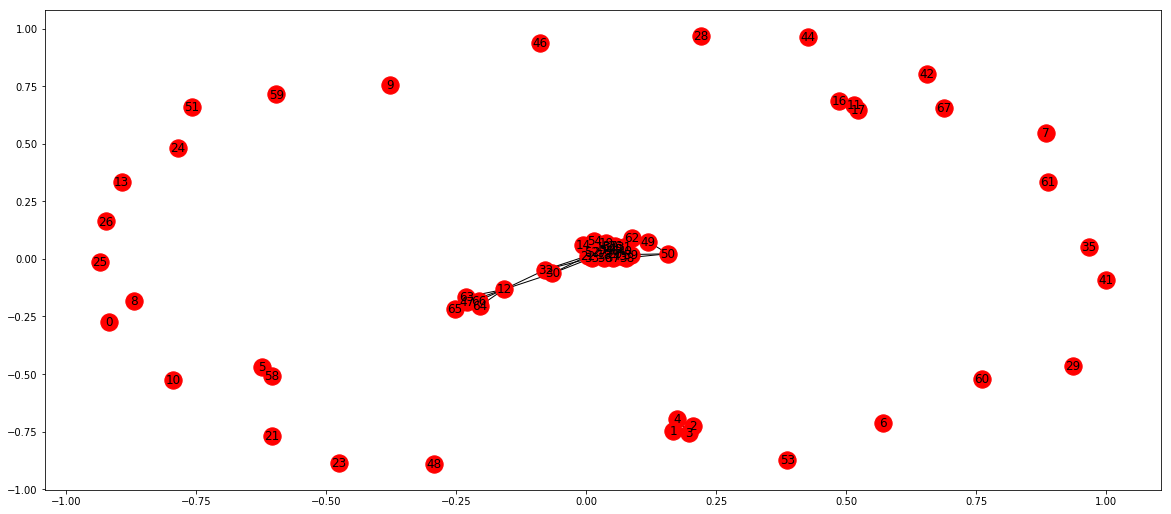

In [174]:
plt.figure(figsize =(20, 30)) 

G.add_nodes_from(get_nodes(adj_matrix_0_055)) 
G.add_edges_from(get_edges(adj_matrix_0_055)) 
  
plt.subplot(311) 
nx.draw_networkx(G) 

In [175]:
adj_matrix_0_075 = adj_matrix_0_075.applymap(lambda x: 1 if x <= 0.075 else 0)

In [176]:
adj_matrix_0_075

,LC521925.1,LC522972.1,LC522973.1,LC522974.1,LC522975.1,LC528232.1,LC528233.1,LR757995.1,LR757996.1,LR757997.1,LR757998.1,MG772933.1,MN908947.3,MN938384.1,MN975262.1,MN985325.1,MN988668.1,MN988669.1,MN988713.1,MN994467.1,MN994468.1,MN996527.1,MN996528.1,MN996529.1,MN996530.1,MN996531.1,MN996532.1,MN997409.1,MT007544.1,MT012098.1,MT019529.1,MT019530.1,MT019531.1,MT019532.1,MT019533.1,MT020781.1,MT020880.1,MT020881.1,MT027062.1,MT027063.1,MT027064.1,MT039873.1,MT039887.1,MT039888.1,MT039890.1,MT044257.1,MT044258.1,MT049951.1,MT050493.1,MT066175.1,MT066176.1,MT072688.1,MT093571.1,MT093631.1,MT106052.1,MT106053.1,MT106054.1,MT118835.1,MT123290.1,MT123291.1,MT123292.1,MT123293.1,MT126808.1,MT135041.1,MT135042.1,MT135043.1,MT135044.1,MT152824.1
LC521925.1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
LC522972.1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
LC522973.1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
LC522974.1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
LC522975.1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
LC528232.1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
LC528233.1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
LR757995.1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
LR757996.1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
LR757997.1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


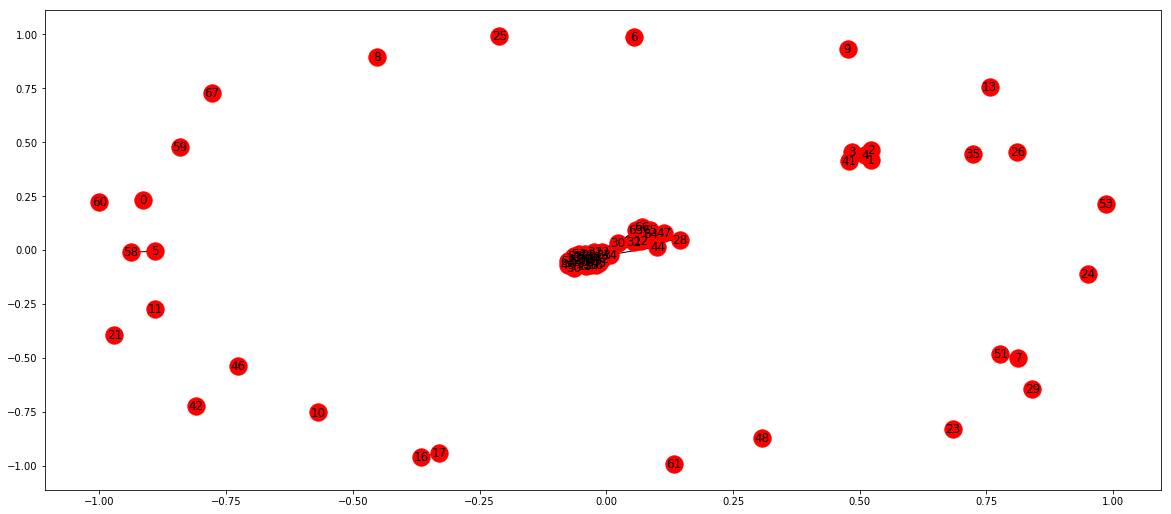

In [177]:
plt.figure(figsize =(20, 30)) 

G.add_nodes_from(get_nodes(adj_matrix_0_075)) 
G.add_edges_from(get_edges(adj_matrix_0_075)) 
  
plt.subplot(311) 
nx.draw_networkx(G) 

In [178]:
adj_matrix_2_0 = adj_matrix_2_0.applymap(lambda x: 1 if x <= 2.0 else 0)

In [179]:
adj_matrix_2_0

,LC521925.1,LC522972.1,LC522973.1,LC522974.1,LC522975.1,LC528232.1,LC528233.1,LR757995.1,LR757996.1,LR757997.1,LR757998.1,MG772933.1,MN908947.3,MN938384.1,MN975262.1,MN985325.1,MN988668.1,MN988669.1,MN988713.1,MN994467.1,MN994468.1,MN996527.1,MN996528.1,MN996529.1,MN996530.1,MN996531.1,MN996532.1,MN997409.1,MT007544.1,MT012098.1,MT019529.1,MT019530.1,MT019531.1,MT019532.1,MT019533.1,MT020781.1,MT020880.1,MT020881.1,MT027062.1,MT027063.1,MT027064.1,MT039873.1,MT039887.1,MT039888.1,MT039890.1,MT044257.1,MT044258.1,MT049951.1,MT050493.1,MT066175.1,MT066176.1,MT072688.1,MT093571.1,MT093631.1,MT106052.1,MT106053.1,MT106054.1,MT118835.1,MT123290.1,MT123291.1,MT123292.1,MT123293.1,MT126808.1,MT135041.1,MT135042.1,MT135043.1,MT135044.1,MT152824.1
LC521925.1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
LC522972.1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
LC522973.1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
LC522974.1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
LC522975.1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
LC528232.1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
LC528233.1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
LR757995.1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
LR757996.1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
LR757997.1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


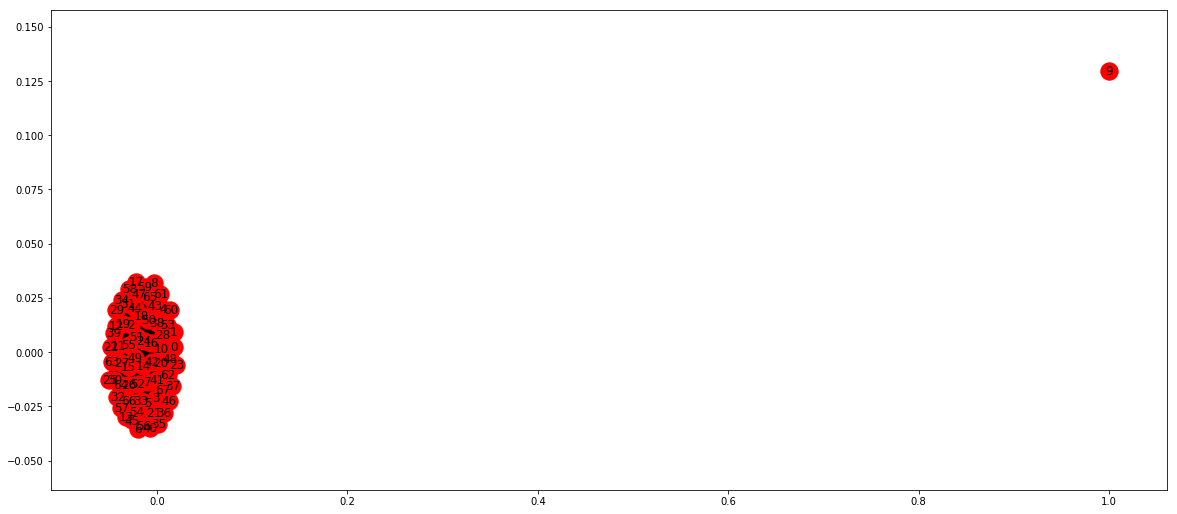

In [180]:
plt.figure(figsize =(20, 30)) 

G.add_nodes_from(get_nodes(adj_matrix_2_0)) 
G.add_edges_from(get_edges(adj_matrix_2_0)) 
  
plt.subplot(311) 
nx.draw_networkx(G) 